<a href="https://colab.research.google.com/github/Sparshj8287/Cyclonet/blob/master/Cyclone_Project_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
pip install touch

Note: you may need to restart the kernel to use updated packages.


In [6]:
import os
import json

# Creating the .kaggle directory
kaggle_dir = os.path.expanduser("~/.kaggle")
os.makedirs(kaggle_dir, exist_ok=True)

# Writing Kaggle API credentials to kaggle.json
api_token = {"username":"sparshjain8287","key":"ec7b20617be61dd75d5c92c221b97e06"}
file_path = os.path.join(kaggle_dir, 'kaggle.json')

with open(file_path, 'w') as file:
    json.dump(api_token, file)

# Changing file permissions
os.chmod(file_path, 0o600)


In [7]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.


In [8]:
!kaggle datasets download -d sshubam/insat3d-infrared-raw-cyclone-images-20132021

insat3d-infrared-raw-cyclone-images-20132021.zip: Skipping, found more recently modified local copy (use --force to force download)


In [9]:
pip install unzip

Note: you may need to restart the kernel to use updated packages.


In [10]:
import zipfile
import os

file_path = 'insat3d-infrared-raw-cyclone-images-20132021.zip'
output_folder = '/extracted_folder'  # Change this to your desired extraction path

# Create the output directory if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Unzipping the file
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall(output_folder)


##First we visualise the data

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
pd.read_csv("insat_3d_ds - Sheet.csv")

,img_name,label
0,25.jpg,25
1,27.jpg,27
2,28.jpg,28
3,30.jpg,30
4,30(1).jpg,30
...,...,...
131,112.jpg,112
132,115.jpg,115
133,118.jpg,118
134,119.jpg,119


In [12]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("/content/insat3d_ir_cyclone_ds"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [13]:
os.mkdir("test_data")

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'test_data'

In [14]:
import os
import shutil
 
source = 'insat3d_ir_cyclone_ds/CYCLONE_DATASET_INFRARED'
destination = 'test_data'
 
# gather all files
allfiles = os.listdir(source)
 
# iterate on all files to move them to destination folder
for f in allfiles[133:]:
    
    src_path = os.path.join(source, f)
    dst_path = os.path.join(destination, f)
    shutil.move(src_path, dst_path)
    

In [15]:
#Get the classes drammatically
import pathlib
data_dir=pathlib.Path("insat3d_ir_cyclone_ds")
data_dir

WindowsPath('insat3d_ir_cyclone_ds')

In [16]:
#Let visualise our images 
import random
def view_random_image(target_dir):
  target_folder=target_dir
  random_image=random.sample(os.listdir(target_folder),10)
  plt.figure(figsize=(10,10))
  for i in range(10):
    img=mpimg.imread(target_folder+"/"+random_image[i])
    plt.subplot(5,2,i+1)
    plt.imshow(img)
    plt.title(random_image[i])
    plt.axis("off");#Default axis is on 

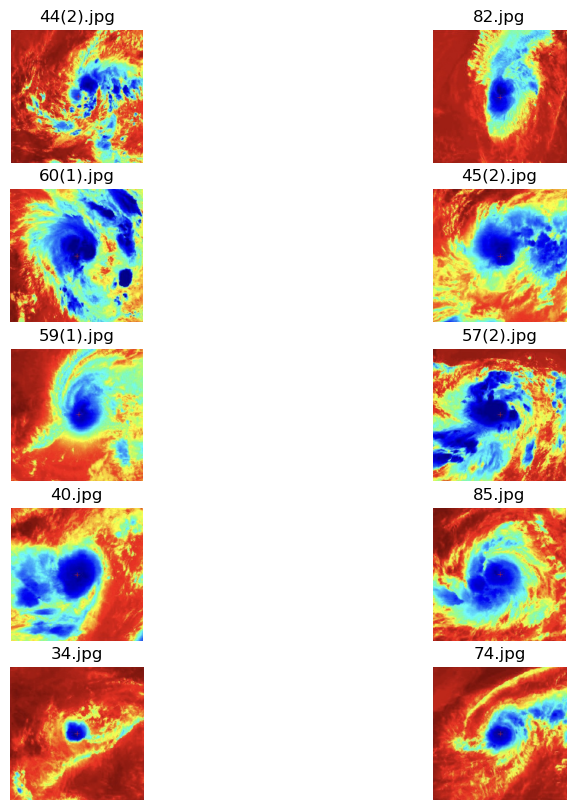

In [17]:
view_random_image("insat3d_ir_cyclone_ds/CYCLONE_DATASET_INFRARED")

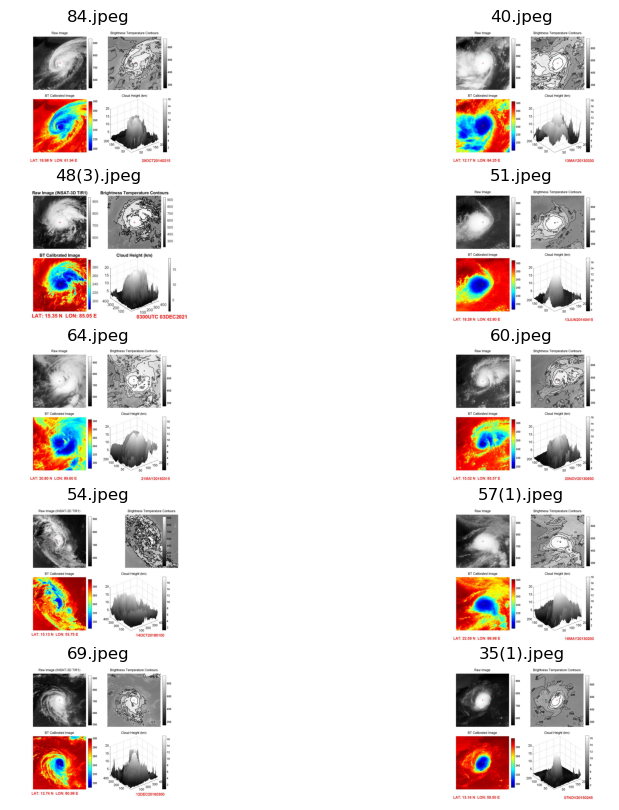

In [18]:
view_random_image("insat3d_for_reference_ds/CYCLONE_DATASET")

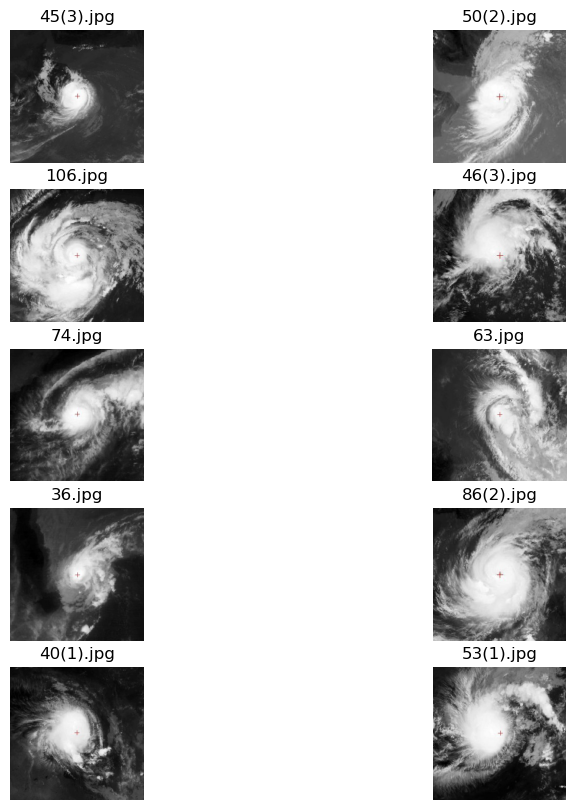

In [19]:
view_random_image("insat3d_raw_cyclone_ds/CYCLONE_DATASET_FINAL")

#Preprocess the data

In [20]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train=pd.read_csv("insat_3d_ds - Sheet.csv")

In [21]:
train_dir="insat3d_ir_cyclone_ds/CYCLONE_DATASET_INFRARED"
train_datagen=ImageDataGenerator(rescale=1./255)
train_data=train_datagen.flow_from_dataframe(train,train_dir,
                                             x_col='img_name',
                                             y_col="label",
                                             subset='training',
                                             target_size=(256,256),
                                             batch_size=16,
                                             class_mode="raw"
                                             )


Found 133 validated image filenames.


c:\Users\USER\anaconda3\Lib\site-packages\keras\src\preprocessing\image.py:1137: UserWarning: Found 3 invalid image filename(s) in x_col="img_name". These filename(s) will be ignored.
  warnings.warn(


#Create a model

In [22]:
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout,Input
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
inputs=Input(shape=(256,256,3))
y=Conv2D(256,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(inputs)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=Conv2D(256,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=MaxPool2D()(y)

y=Conv2D(256,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=Conv2D(128,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=MaxPool2D()(y)

y=Conv2D(128,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=Conv2D(64,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=MaxPool2D()(y)

y=Conv2D(64,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=Conv2D(32,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=MaxPool2D()(y)

y=Conv2D(32,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=Conv2D(16,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=MaxPool2D()(y)

y= Flatten()(y)
outputs=Dense(1,activation='linear')(y)
model_1=Model(inputs=inputs,outputs=outputs)

In [23]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 256)     7168      
                                                                 
 batch_normalization (Batch  (None, 256, 256, 256)     1024      
 Normalization)                                                  
                                                                 
 tf.nn.relu (TFOpLambda)     (None, 256, 256, 256)     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 256)     590080    
                                                                 
 batch_normalization_1 (Bat  (None, 256, 256, 256)     1024      
 chNormalization)                                            

In [24]:
model_1.compile(loss=tf.keras.losses.mse,
                optimizer=tf.keras.optimizers.Adam(lr=0.002),
                metrics=["mse"])
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="loss",patience=10,mode='min')

In [25]:
history_1=model_1.fit(train_data,
                      epochs=1,callbacks=[early_stopping])

9/9 [==============================] - 1266s 154s/step - loss: 3689.3401 - mse: 3203.3411


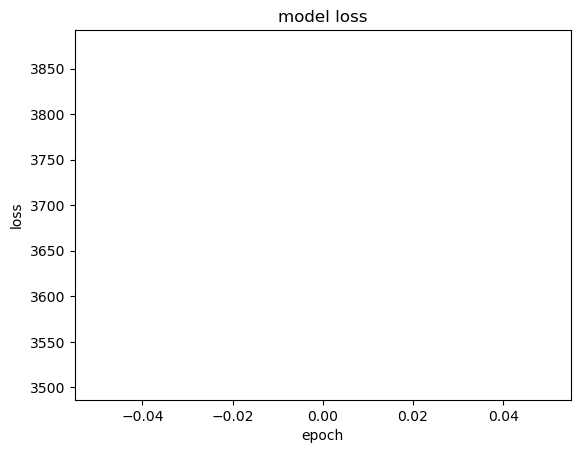

In [26]:
plt.plot(history_1.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [27]:
def load_and_prep_image(filename, img_shape=256):
  
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  img = img/255.
  return img

In [28]:
def pred_and_plot(model, filename):
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  
# Plot the image and predicted value
  plt.imshow(img)
  plt.title(f"Prediction: {pred}")
  plt.axis(False);

1/1 [==============================] - 2s 2s/step


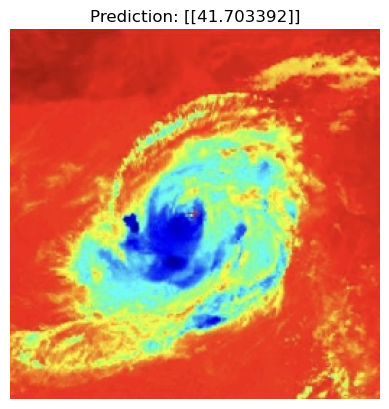

In [32]:
pred_and_plot(model_1,"test_data\94.jpg")

1/1 [==============================] - 1s 1s/step


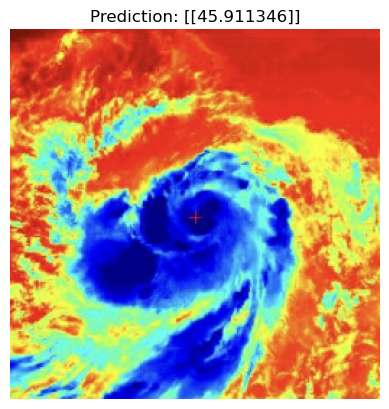

In [33]:
pred_and_plot(model_1,"test_data\98.jpg")

1/1 [==============================] - 1s 952ms/step


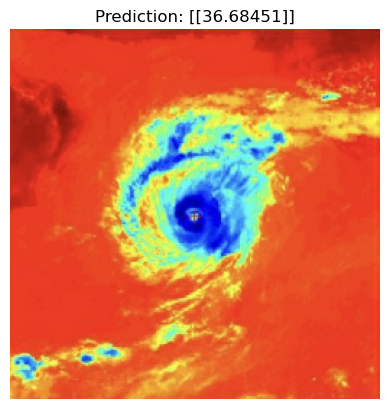

In [34]:
pred_and_plot(model_1,"test_data/99.jpg")

1/1 [==============================] - 1s 677ms/step


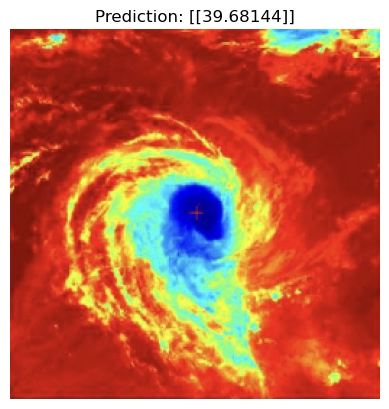

In [35]:
pred_and_plot(model_1,"insat3d_ir_cyclone_ds/CYCLONE_DATASET_INFRARED/69.jpg")

1/1 [==============================] - 1s 976ms/step


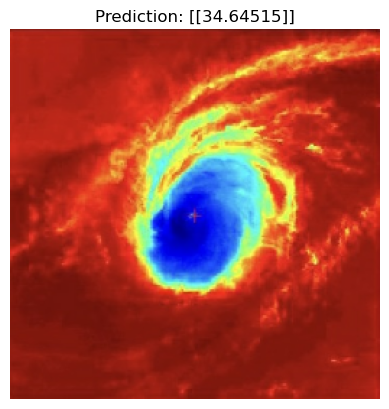

In [36]:
pred_and_plot(model_1,"insat3d_ir_cyclone_ds/CYCLONE_DATASET_INFRARED/85(2).jpg")

1/1 [==============================] - 1s 739ms/step


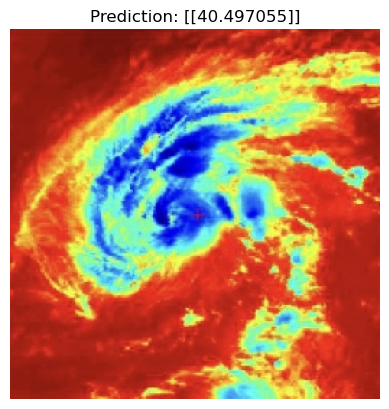

In [39]:
pred_and_plot(model_1,"insat3d_ir_cyclone_ds/CYCLONE_DATASET_INFRARED/35.jpg")

In [ ]:
import pickle
filename= "Trained_model.sav"
a=open(filename,'wb')
pickle.dump(model_1,a)
a.flush()
a.close()


In [ ]:
from google.colab import files
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>